<a href="https://colab.research.google.com/github/hl105/deep-learning-practice/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Trees
---
(from [towarddatascience article](https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c))
1. ex) try to classify if a patient is diabetic or not based on predictor variables (BMI, BP, etc.).
2. split the predictor space. The target variable is split into different subgroups that are more homeogenous.
3. def: branching flow diagram.
 - target variable
 - node purity: decision nodes are typically impture, or would have only one class(is diabetic) if its pure.
 - decision nodes: intermediate nodes where target variable is split
 - leaf nodes: pure nodes - so used for making prediction
4. questions:
 - flow of info through the tree
 - how to select which variable to split on at decision nodes?
 - how do we know if the tree has enough branches?
 5. answers:
  - flow:
    - root node: first node that splits the target variable
    - we find this by evluating the impact of all variables that splits the target variables into the most homogeneous
    - we split and try to get it to have only one category (purity)
  - recursive bianary splitting: top-down, greedy(best split is made) approach
  - variable selction criterion:
   - 1. Entropy and Information Gain
    - entropy: measure of impurity in a node
    - maximum is 1, min is 0
    - information gain: the change in entropy when the tree calculates the entropy for each variable and potential splits.Entropy_parent - Entropy_children
   - 2. Gini Index
    - measure probability for a random instance being misclassfied when chosen randomly.
    - lower Gini Index = lower likelyhood of misclassification = good
    - min = 1 (highest purity), max = 0.5 (random assignment of classes)
  - overfitting:
    - it's easy to verfit -- leaf node only has one or two instances, bad genearlization. We can prevent this by:
     - **Pre pruning** (early stopping).
       - tune **hyperparameters** prior to training. max_depth, min_samples_leaf, min_samples_split. Use **GridSearchCV** technique to find best et of hyperparameters
       - horizon problem: early stopping may prevent fruitful splits down the line
     - **Post pruning**: allow tree to grow to full depth and get rid of brances
       - criteria: **MSE** for regression trees, **classification error** for classifcation trees
       - problem: tree can grow very deep and larnge, so evaluation can be expenseive.
       - **Cost complexity pruning** (CCP):
         1. how do we know what sub tree to prune? intutition: remove subtrees so that the test error rate will get lower. But trying this for every branch is very expensive.
         2. CCP uses the tuning parameter α. α controls a trade-off beween the subtree's complexity and fit to the training data.
         3. if α = 0, we are minimizing the training loss.  Thre tree will be the same as the original tree.
         4. the algorithm hunts out nodes where the training loss is alreay high and can be minimized with a small α.
         5.sklearn privides: DecisionTreeClassifier.cost_compelxity_pruning_path that reutrns effective αs and total leaf impurities at each step fo the pruning process
     - ensembling

  

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz

In [20]:
df = load_iris(as_frame = True).frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
y = df['target'] # features
X = df.drop('target', axis =1) # target variable

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [23]:
# create model
clf = tree.DecisionTreeClassifier() # default is gini

#train model
clf = clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)

In [24]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9777777777777777


Visualizing Decision Trees

[Text(0.5, 0.9, 'x[2] <= 2.45\ngini = 0.661\nsamples = 105\nvalue = [29, 40, 36]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'x[3] <= 1.75\ngini = 0.499\nsamples = 76\nvalue = [0, 40, 36]'),
 Text(0.3076923076923077, 0.5, 'x[2] <= 4.95\ngini = 0.169\nsamples = 43\nvalue = [0, 39, 4]'),
 Text(0.15384615384615385, 0.3, 'x[3] <= 1.65\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8461538461538461, 0.5, 'x[2] <= 4.85\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(0.7692307692307693, 0.3, 'x[0] <=

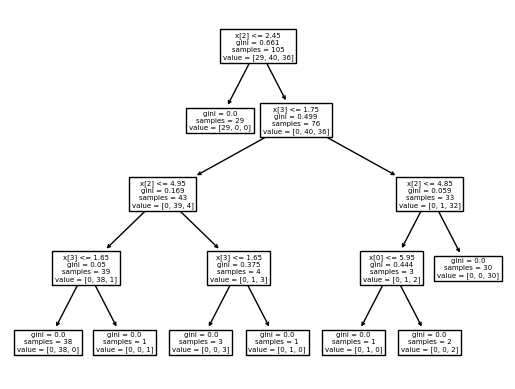

In [25]:
plt.figure()
tree.plot_tree(clf)


values represent class distirbution at specific node.

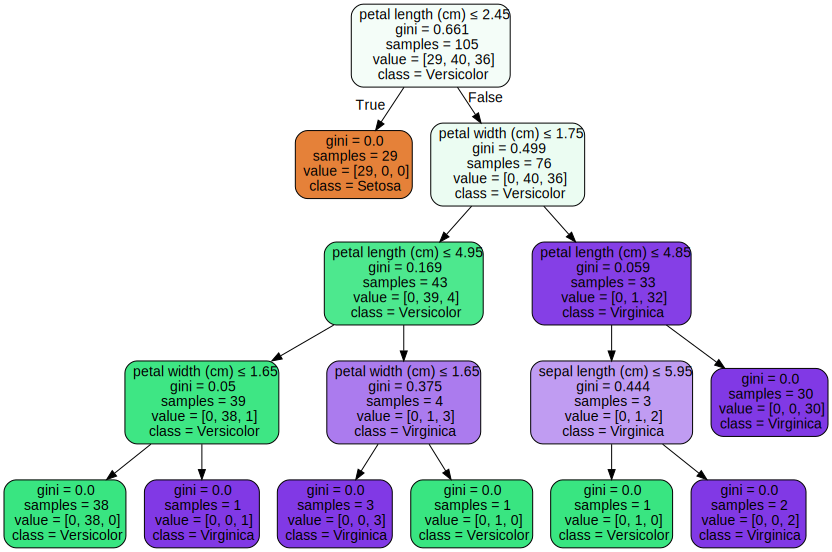

In [38]:
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = X_train.columns, class_names = ["Setosa", "Versicolor","Virginica"], filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph

Using Information Gain as Criterion
---

In [42]:
# create model
clf2 = tree.DecisionTreeClassifier(criterion = "entropy")

#train model
clf2 = clf.fit(X_train, y_train)

# predict
y_pred2 = clf2.predict(X_test)

In [43]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred2))

Accuracy: 0.9777777777777777


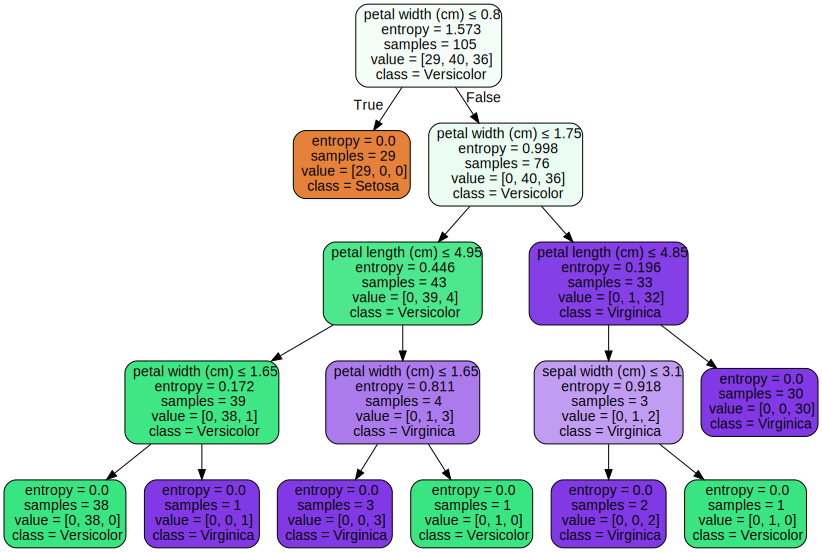

In [44]:
dot_data = tree.export_graphviz(clf2, out_file = None, feature_names = X_train.columns, class_names = ["Setosa", "Versicolor","Virginica"], filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph

In [46]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(f"confusion matrix:\n {cm}")

confusion matrix:
 [[21  0  0]
 [ 0  9  1]
 [ 0  0 14]]


We already have a high accuracy rate, but if we did not we could use the following methods to **optimize decision tree performance**

1. change the criterion (like we did above)
2. change the splitter. default is "best", there is also "random" to choose the best random split. We would choose random when we have a big dataset /want to reduce overfitting / building ensemble models.
3. max_depth